In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Пропусков в датасете нет, дополнительных действий не требуется. Если бы они были, то помимо варианта их удаления, можно подставить базывые статистики(для количественных среденее или медиану, для категориальных моду). Единственное для этого спопособа нужно просмотерть расспределение данных, и желательно удалить выбросы, чтобы не произошло сильных искажений.

<AxesSubplot:title={'center':'Рабочие часы в неделю'}, ylabel='Frequency'>

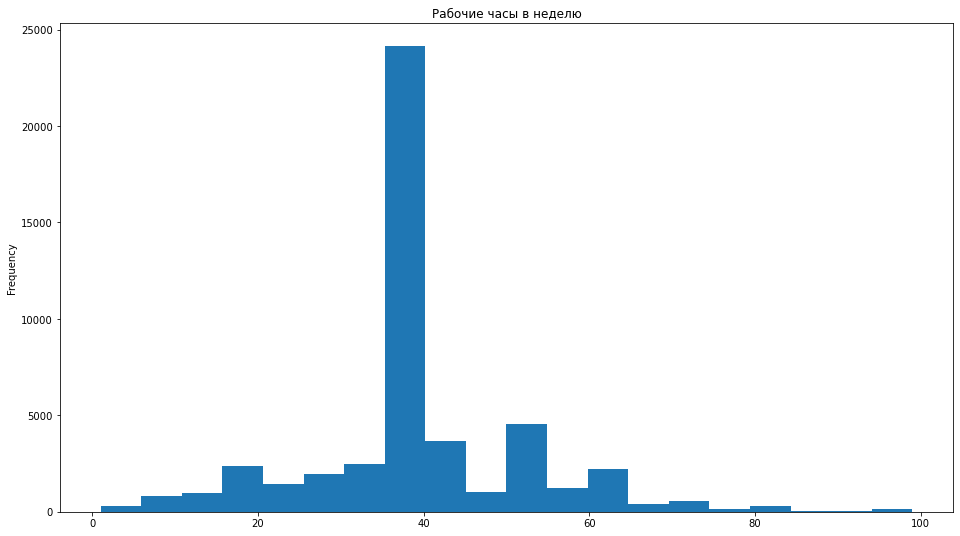

In [25]:
df['hours-per-week'].plot(kind='hist', title='Рабочие часы в неделю', bins= 20, figsize=(16, 9))

По этой гистограме видно, что подавляющее число людей имеет 40 часовую неделю. Осталбные случаи расспределенны более менее равномерно. Хвост с правой стороны более плотный, где меньше часов в неделю.

<AxesSubplot:title={'center':'Часы в неделю по сфере занятости'}, xlabel='Занятость', ylabel='Часы в неделю'>

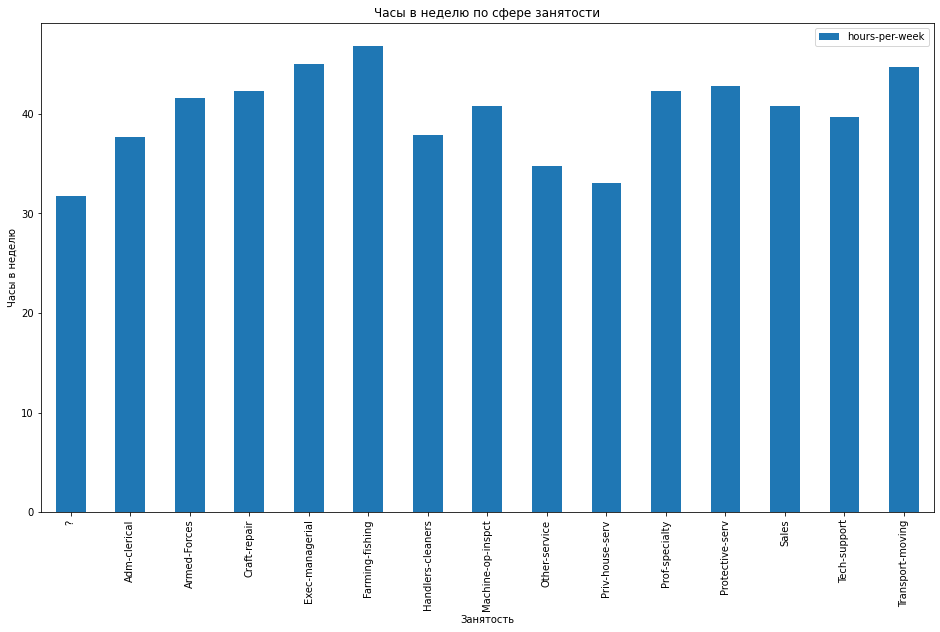

In [38]:
df[['occupation', 'hours-per-week']].groupby('occupation').mean().plot(kind='bar', title='Часы в неделю по сфере занятости',
                                                                xlabel='Занятость', ylabel='Часы в неделю', figsize=(16, 9))

По сферам деятельности в среднем расспределние более менее равномерное. Больше всего работают в сферах сельского хозяйства и трансопртировки.

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

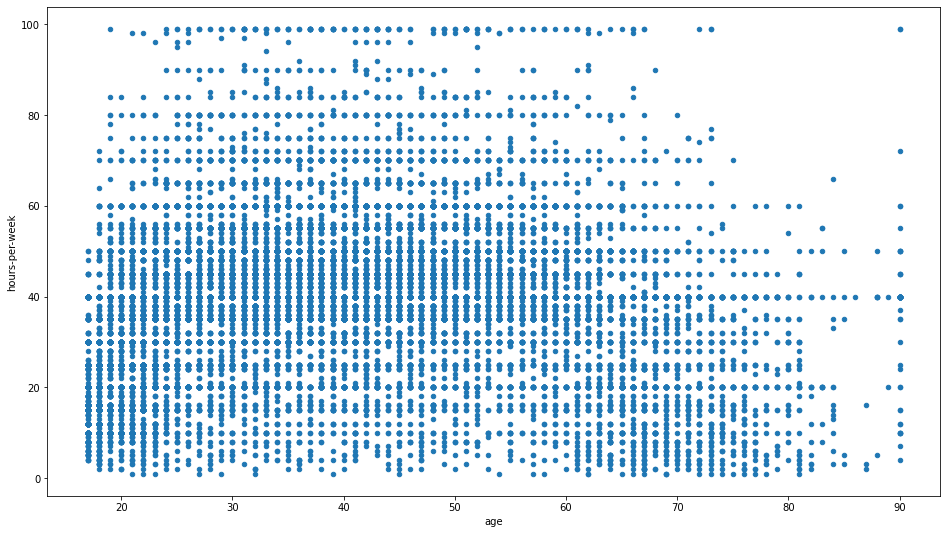

In [18]:
df.plot(kind='scatter', x='age', y='hours-per-week', figsize=(16, 9))

По этой диаграмме рассеяния видно, что совсем молодые и пожилые люди часто работают неполный рабочий день. С 25 по 60 лет в оснвоном работают полный рабочий день от 40 до 60 часов в неделю с основной массе.

In [44]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [46]:
df_select = df[['age', 'workclass', 'fnlwgt', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
X = pd.get_dummies(df_select, columns = ['workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
X.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,7688,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,0,0,30,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [53]:
le = LabelEncoder()
le.fit(df['income'])
y = pd.Series( data = le.transform(df['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

Логистическая регрессия

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [76]:
model.score(X_test, y_test)

0.8038693827413246

SVM

In [81]:
model2 = SVC(kernel='poly')
model2.fit(X_train, y_train)

SVC(kernel='poly')

In [82]:
model2.score(X_test, y_test)

0.7885146893233699

Модели по точности одинаковые(практически). Логистическая регрессия при этом работает гораздо быстрее чем SVM.

In [63]:
df.iloc[30507]

age                            43
workclass                 Private
fnlwgt                     170525
education               Bachelors
educational-num                13
marital-status           Divorced
occupation         Prof-specialty
relationship        Not-in-family
race                        White
gender                     Female
capital-gain                14344
capital-loss                    0
hours-per-week                 40
native-country      United-States
income                       >50K
Name: 30507, dtype: object

In [64]:
df.iloc[7762]

age                           56
workclass                Private
fnlwgt                     33115
education                HS-grad
educational-num                9
marital-status          Divorced
occupation         Other-service
relationship           Unmarried
race                       White
gender                    Female
capital-gain                   0
capital-loss                   0
hours-per-week                40
native-country     United-States
income                     <=50K
Name: 7762, dtype: object

Обе модели показали высокую точность предсказания. Логистичесская регрессия в данном случае подходит больше скорости обучения и хоть и небольшой, но более высокой точности. Для svm kernel полиноминальный не имеет смыл использовать в данном датасете, так как точность падает, а скорость обучения падает на порядок. Для улучешения качесвта моделей стоит удалить из датасета строки имеюющее неопределенные значения(С пометкой ?). Они не являются пропусками технически и помечаются в результате обработки данных как отдельный класс, что не совсем верно. Возможно имеет смыл происледовать данные, чтобы определить какие признаки имеют больший вес, а также убрать маловлияющие и линейнозависимые, чтобы увеличть скорость обучения модели.